# Getting Norm Notebook

In [1]:
import pyrealsense2 as rs
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Setup
pipeline = rs.pipeline()
config = rs.config()
config.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)
config.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)
profile = pipeline.start(config)
depth_sensor = profile.get_device().first_depth_sensor()
depth_scale = depth_sensor.get_depth_scale()
align_to = rs.stream.color
align = rs.align(align_to)

In [3]:
frames = pipeline.wait_for_frames()
aligned_frames = align.process(frames)
aligned_depth_frame = aligned_frames.get_depth_frame()
color_frame = aligned_frames.get_color_frame()

## Preprocessing

In [4]:
dec_filter = rs.decimation_filter()
dec_filter.set_option(rs.option.filter_magnitude, 4)

spa_filter = rs.spatial_filter()
spa_filter.set_option(rs.option.filter_magnitude, 5)
spa_filter.set_option(rs.option.filter_smooth_alpha, 1)
spa_filter.set_option(rs.option.filter_smooth_delta, 50)
spa_filter.set_option(rs.option.holes_fill, 3)

tmp_filter = rs.temporal_filter()
hol_fillin = rs.hole_filling_filter()

dep_to_dis = rs.disparity_transform(True)
dis_to_dep = rs.disparity_transform(False)

In [5]:
aligned_depth_frame = dec_filter.process(aligned_depth_frame)
aligned_depth_frame = dep_to_dis.process(aligned_depth_frame)
aligned_depth_frame = spa_filter.process(aligned_depth_frame)
aligned_depth_frame = tmp_filter.process(aligned_depth_frame)
aligned_depth_frame = dis_to_dep.process(aligned_depth_frame)
aligned_depth_frame = hol_fillin.process(aligned_depth_frame)

depth_image = np.asanyarray(aligned_depth_frame.get_data())
color_image = np.asanyarray(color_frame.get_data())

## Analyze Color Image

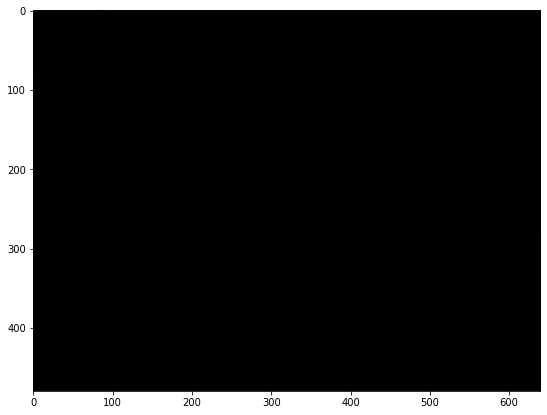

In [6]:
plt.figure(figsize=(10, 7))
plt.imshow(color_image)
plt.show()

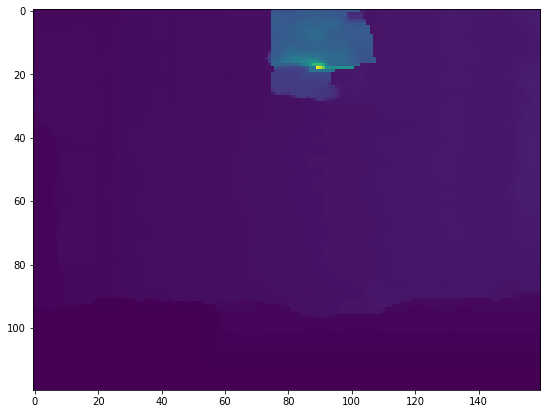

In [7]:
plt.figure(figsize=(10, 7))
plt.imshow(depth_image)
plt.show()

In [8]:
color_image.shape

(480, 640, 3)

In [9]:
depth_image.shape

(120, 160)

In [10]:
480 / 120

4.0